## Задача 1. Двухслойные итерационные методы. (2 балла).

Реализуйте метод итераций для решения системы линейных уравнений (метод Якоби). Для этого перепишите уравнение $A x=b$, выделив диагональную часть матрицы $A$ :
$$
A=D+(A-D)
$$

в виде
$$
x_{n+1}=B x_n+c,
$$

где $B=D^{-1}(D-A)$.

Найдите $c$.

Создайте случайную матрицу с диагональным доминированием.

Вычислите норму соответствующей матрицы $B$ и выполните итерации Якоби. Убедитесь, что результирующий вектор $x$ действительно решает исходную систему.



$(D + A - D) x = b \qquad E x - B x = D^{-1} b \Rightarrow c = D^{-1} b$

In [27]:
import numpy as np

def jacobi(B, c, n=None, eps=None, x0=None):
    if x0 is None:
        x0 = c
    if n is None:
        n = 100
    if eps is None:
        eps = 1e-6
    xp = x0
    x = xp
    for k in range(n):
        x = B @ xp + c
        if np.linalg.norm(x - xp) < eps:
            break
        xp = x
    return x

n = 2
A = np.random.normal(size=(n, n))
b = np.random.normal(size=(n, 1))
D = np.diag(A)
B = np.diag(1 / D) @ (np.diag(D) - A)
c = np.diag(1 / D) @ b
print(np.linalg.norm(B))
x = jacobi(B, c)
A @ x - b, np.allclose(A @ x, b)

1.0875934397083507


(array([[ 5.48761068e-07],
        [-2.01899122e-09]]),
 True)

## Задача 2. Спектр матрицы и функции от матриц. (3 балла).

1. Напишите программу, которая вычисляет коэффициенты характеристического многочлена произвольной матрицы.

2. Сгенерируйте случайную матрицу размера 100 на 100, вычислите полином и найдите его корни с помощью numpy.roots.

3. Сравните найденные корни с собственными значениями матрицы, изобразив и те, и другие на комплексной плоскости, двумя разными цветами.

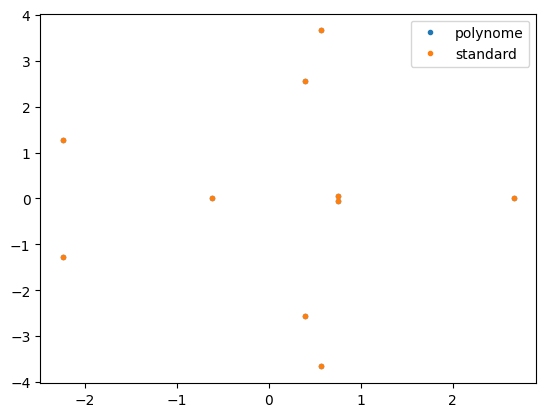

In [111]:
import numpy as np
import sympy as sp
from itertools import combinations
import matplotlib.pyplot as plt

def koeff(A, k):
    if k == 0:
        return np.linalg.det(A)
    elif k == A.shape[0]:
        return 1 if k % 2 == 0 else -1
    koeff = 0
    for indices in combinations(np.arange(A.shape[0]), k):
        B = np.delete(A, indices, axis=0)
        B = np.delete(B, indices, axis=1)
        koeff += np.linalg.det(B) * (-1) ** k
    return koeff

n = 10
A = np.random.normal(size=(n, n))
poly = np.array([koeff(A, k) for k in range(n + 1)])[::-1]
vals = np.roots(poly)
eval = np.linalg.eigvals(A)
plt.plot(vals.real, vals.imag, '.', label='polynome')
plt.plot(eval.real, eval.imag, '.', label='standard')
plt.legend()

## Задача 3. Экстремальное собственное значение и соответствующий собственный вектор. (3 балла).

Рассмотрим квантовую частицу, описываемую волновой функцией $\psi(x)$ , находящуюся в потенциальной яме $V(x)$.
Для простоты рассмотрим только одномерную вещественную переменную $x$.

Волновая функция частицы подчиняется уравнению Шедингера


$$
-\frac{\hbar^2}{2m} \psi''(x)  + V(x)\psi(x) = E\psi(x)\;.
$$

Здесь мы рассматриваем так называемый потенциал прямоугольной ямы,


$$
V(x) = %
\begin{cases}
&0, &0 < x < a \\
&\infty, &\text{в остальных случаях.}
\end{cases}
$$

Определите сетку

$$x_j = a \frac{j}{N}, \qquad j=0, \cdots, N
$$

и сеточную функцию $\psi_j$.

Уравнение Шредингера становится

$$
\psi_{j-1} + \psi_{j+1} - 2\psi_{j} = -k^2 h^2 \psi_j \; , \qquad j = 1, \cdots, N-1
$$

где $h=a/N$ является расстоянием между сетками, а граничнми условия являются $\psi_0 = \psi_N = 0$.

Обратите внимание, что последнее уравнение определяет задачу на собственные значения в  $N-1$ мерном пространстве, охватываемом векторами $(\psi_1, \psi_2, \cdots, \psi_{N-1})^T$. Здесь матрица, собственные значения которой мы ищем, является трехдиагональной, а допустимые значения $(k h)^2$ являются ее собственными значениями.



1. Напишите функцию, которая возвращает матрицу для задачи на собственные значения, описанной выше.

Функция numpy `np.fill_diagonal` может быть удобна при решении задачи. Также обратите внимание, что для заполнения диагоналей вы можете разрезать матрицу примерно так: `a[1:, :]`.

2. Напишите функцию, которая возвращает собственные значения и собственные векторы гамильтониана с учетом числа точек на сетке.

3. Постройте волновые функции (т.е. собственные векторы) для нескольких наименьших  состояний. Сравните с ожидаемой формой.



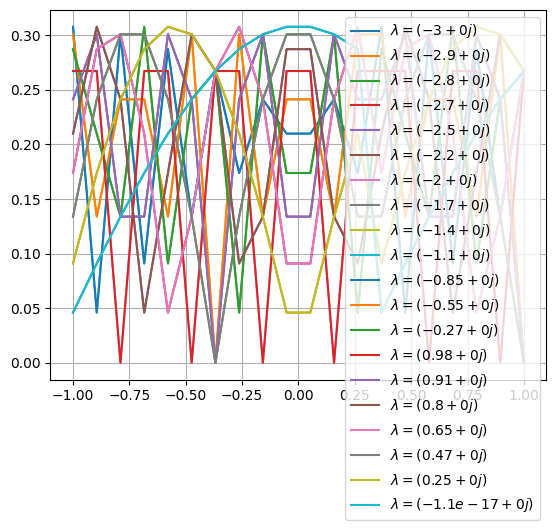

In [128]:
import numpy as np
import scipy as sp

def mat(kh, n):
    main = np.ones(n) * (-2 + kh * kh)
    secondary = np.ones(n - 1)
    return sp.sparse.diags([main, secondary, secondary], [0, 1, -1])

def eigs(A):
    return sp.linalg.eig(A.toarray())

a = 1
N = 20
kh = 1
A = mat(kh, N)
ws, vs = eigs(A)
x = np.linspace(-a, a, N)
for w, v in zip(ws, vs):
    plt.plot(x, np.abs(v), label=rf'$\lambda = {w:.2}$')
plt.legend()
plt.grid()

## Задача 4. Решение нелинейных уравнений и систем, локализация корней. (4 балла).

Реализуйте метод простой итерации для нахождения решения следующих уравнений относительно $x$ :\
(i) $1+\cos x=0$,\
(ii) $x^2=2$.

Используйте следующие итерационные формулы:\
(i) $x_{k+1}=x_k+\frac{\cos x_k+1}{\sin x_k}$,\
(ii) $x_{k+1}=\frac{1}{2}\left(x_k+\frac{2}{x_k}\right)$.

В обоих случаях, стартуйте с $x_0=1$. Какова сходимость итераций (линейная/квадратичная) для случаев (i) и (ii)?

Система оценивания.

По 1 баллу за реализацию каждого примера и ещё по 1 баллу за правильный ответ на вопрос с обоснованием для каждого примера.

In [76]:
import numpy as np

def i1(x):
    return x + (np.cos(x) + 1) / np.sin(x)

def i2(x):
    return (x + 2 / x) / 2

def solve(step, x0=1, eps=None, n=None):
    if eps is None:
        eps = 1e-12
    if n is None:
        n = 1000
    if x0 is None:
        x0 = 1
    steps = []
    xp = x0
    x = x0
    for k in range(n):
        x = step(xp)
        delta = np.abs(x - xp)
        steps.append((k, x, delta))
        if delta < eps:
            break
        xp = x
    return steps

s1 = np.array(solve(i1, eps=0, n=25))
s2 = np.array(solve(i2, eps=0, n=25))
s1[-1][1], s2[-1][1]

(3.1415926346435645, 1.414213562373095)

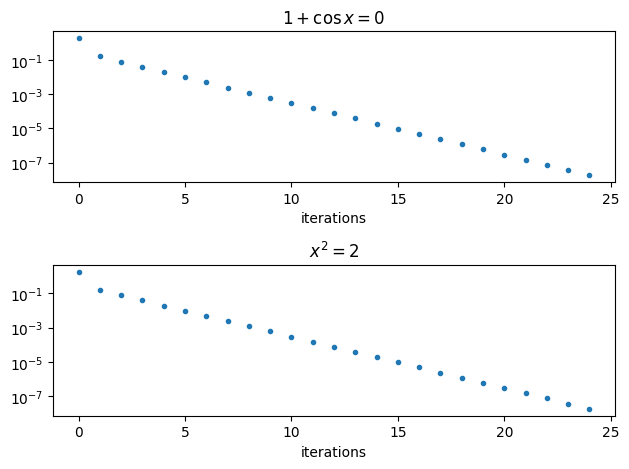

In [77]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)
for s, ax, name in zip((s1, s2), axs, (r'$1+\cos x=0$', r'$x^2=2$')):
    ax.plot(s1.T[0], s1.T[2], '.', label='eps')
    ax.set_title(name)
    ax.set_yscale('log')
    # ax.set_xscale('log')
    ax.set_xlabel('iterations')
fig.tight_layout()

## 1
$$ f_1(x) = 1 - \cos(x) \qquad f_1'(\pi) = 0 \qquad f_1''(\pi) \neq 0
\Rightarrow 2\ \text{порядок сходимости}$$

## 2
$$ f_2(x) = x^2 - 2 \qquad f_2'(\sqrt 2) = 2 \sqrt 2
\Rightarrow 1\ \text{порядок сходимости}$$